# Arnoldi Iteration

In [5]:
import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as pt

Let us make a matrix with a defined set of eigenvalues and eigenvectors, given by `eigvals` and `eigvecs`.

In [6]:
np.random.seed(40)

# Generate matrix with eigenvalues 1...25
n = 25
eigvals = np.linspace(1., n, n)
eigvecs = np.random.randn(n, n)
print(eigvals)

A = la.solve(eigvecs, np.dot(np.diag(eigvals), eigvecs))
print(la.eig(A)[0])

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.]
[ 25.  24.  23.   1.   2.   3.  22.   4.  21.  20.   5.   6.   7.  19.  18.
   8.   9.  17.  16.  10.  11.  12.  15.  14.  13.]


## Initialization

Set up $Q$ and $H$:

In [41]:
Q = np.zeros((n, n))
H = np.zeros((n, n))

k = 0

Pick a starting vector, normalize it

In [42]:
x0 = np.random.randn(n)
x0 = x0/la.norm(x0)

# Poke it into the first column of Q
Q[:, k] = x0

del x0

Make a list to save arrays of Ritz values:

In [43]:
# ritz_values = []

## Algorithm

Carry out one iteration of Arnoldi iteration.

Run this cell in-place (Ctrl-Enter) until H is filled.

24


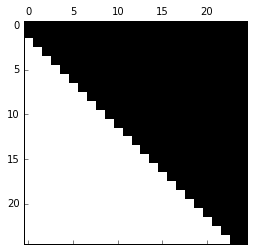

In [68]:
print(k)

u = A @ Q[:, k]

# Carry out Gram-Schmidt on u against Q
for j in range(k+1):
    qj = Q[:, j]
    H[j,k] = qj @ u
    u = u - H[j,k]*qj

if k+1 < n:
    H[k+1, k] = la.norm(u)
    Q[:, k+1] = u/H[k+1, k]

k += 1

pt.spy(H)

ritz_values.append(la.eig(H)[0])

Check that $Q^T A Q =H$:

In [69]:
la.norm(Q.T @ A @ Q - H)/ la.norm(A)

1.1737482867077595e-07

Check that Q is orthogonal:

In [70]:
la.norm(Q.T @ Q - np.eye(n))

8.1107123737065295e-07

## Plot convergence of Ritz values

Enable the Ritz value collection above to make this work.

/usr/lib/python3/dist-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


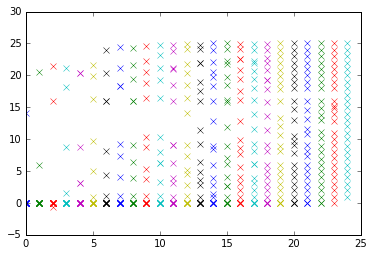

In [74]:
for i, rv in enumerate(ritz_values):
    pt.plot([i] * len(rv), rv, "x")